In [1]:
from matplotlib import pyplot as plt
from boutdata import collect
import torch
import lightning as L

from model import DiffusionModel

import dataloader
from torch.utils.data import DataLoader

In [2]:
path = "../Data/Data_Files/"
checkpoint_path = "diffusion_256.ckpt"

In [3]:
spatial_resolution = 256

In [4]:
batch_size = 8 
train_loader, val_loader, test_loader = dataloader.build_dataloader(
    seq_len=4,
    batch_size=batch_size,
    seed=12,
    spatial_resolution=spatial_resolution,
    normalize=True,
    dataset_name='Test',
)

mxsub = 8 mysub = 1 mz = 1024

nxpe = 128, nype = 1, npes = 128

Reading from 0: [0-9][0-0] -> [0-9][0-0]

Reading from 1: [2-9][0-0] -> [10-17][0-0]

Reading from 2: [2-9][0-0] -> [18-25][0-0]

Reading from 3: [2-9][0-0] -> [26-33][0-0]

Reading from 4: [2-9][0-0] -> [34-41][0-0]

Reading from 5: [2-9][0-0] -> [42-49][0-0]

Reading from 6: [2-9][0-0] -> [50-57][0-0]

Reading from 7: [2-9][0-0] -> [58-65][0-0]

Reading from 8: [2-9][0-0] -> [66-73][0-0]

Reading from 9: [2-9][0-0] -> [74-81][0-0]

Reading from 10: [2-9][0-0] -> [82-89][0-0]

Reading from 11: [2-9][0-0] -> [90-97][0-0]

Reading from 12: [2-9][0-0] -> [98-105][0-0]

Reading from 13: [2-9][0-0] -> [106-113][0-0]

Reading from 14: [2-9][0-0] -> [114-121][0-0]

Reading from 15: [2-9][0-0] -> [122-129][0-0]

Reading from 16: [2-9][0-0] -> [130-137][0-0]

Reading from 17: [2-9][0-0] -> [138-145][0-0]

Reading from 18: [2-9][0-0] -> [146-153][0-0]

Reading from 19: [2-9][0-0] -> [154-161][0-0]

Reading from 20: [2-9][0-0] -> [

In [5]:
def visualize_images(input_tensor, target_tensor, prediction_tensor, n=1):
    for i in range(n):
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Input images
        axes[0].imshow(input_tensor[i].permute(1, 2, 0))  # Assuming the shape is [C, H, W]
        axes[0].set_title('Input Image')
        axes[0].axis('off')

        # Target images
        axes[1].imshow(target_tensor[i].permute(1, 2, 0))  # Adjust if needed
        axes[1].set_title('Target Image')
        axes[1].axis('off')

        # Predicted images
        axes[2].imshow(prediction_tensor[i].permute(1, 2, 0))  # Adjust if needed
        axes[2].set_title('Predicted Image')
        axes[2].axis('off')

        plt.show()

In [6]:
model = DiffusionModel.load_from_checkpoint(checkpoint_path)

Non-A100 GPU detected, using math or mem efficient attention if input tensor is on cuda


In [7]:
input_batch = next(iter(test_loader))  # Get a single batch
x = input_batch[0].to(model.device)  # Input tensor
y = input_batch[1].to(model.device)  # Target tensor

y_hat = model.infer(x)

# Move tensors to CPU for visualization and detach them
x_cpu = x.cpu().detach()
y_cpu = y.cpu().detach()
y_hat_cpu = y_hat.cpu().detach()

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# Check if shape is correct
print(x.shape) 
print(y.shape)
print(y_hat_cpu.shape)

torch.Size([8, 2, 256, 256])
torch.Size([8, 2, 256, 256])
torch.Size([])
tensor(0.2445)


TypeError: Invalid shape (256, 256, 2) for image data

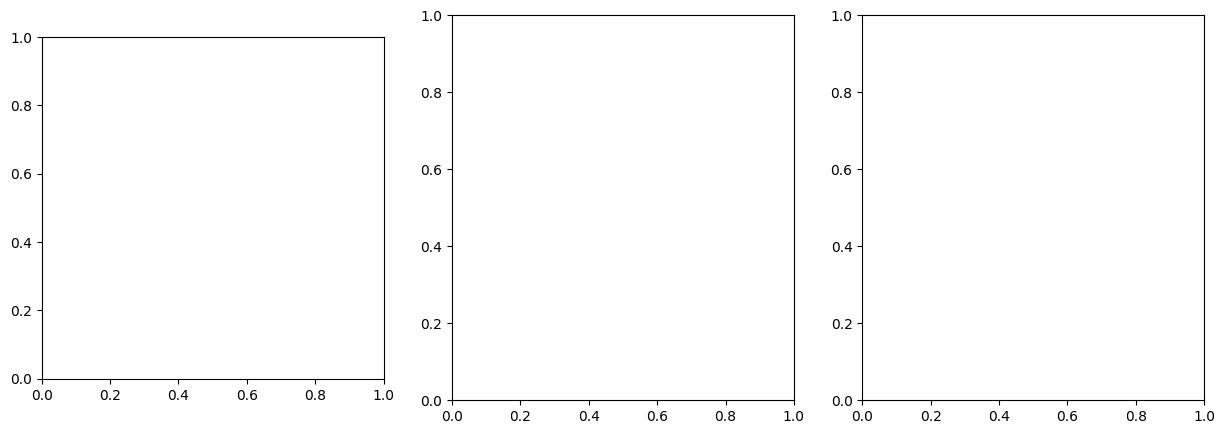

In [ ]:
visualize_images(x_cpu, y_cpu, y_hat_cpu, n=1)